# 🔊 Visualising audio with Python

<img src="https://miro.medium.com/max/1100/1*Zx9QAMPzxhama9O4q9xWXg.jpeg" width="600"/>

This notebook is intended to be an introduction for anyone interested in using python to interperate audio data.

Please watch the youtube video that discusses the contents of this notebook if you want to learn more!
- [Video Link](https://www.youtube.com/watch?v=ZqpSb5p1xQo)

## Contents
0. Installing and importing packages
1. Some theory
2. Reading in Audio Files and creating a waveform and sound graph
3. Creating a Spectogram
4. Creating a Mel Spectogram

## 0. Installing and importing packages

In [2]:
pip install numba

  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.3
    Uninstalling numpy-1.22.3:
      Successfully uninstalled numpy-1.22.3



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\31653\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

## 1. Some theory 

Terms to know for Audio in Digital Form:

### Frequency (Hz)
- Frequency describes the differences of wave lengths.
- We interperate frequency has high and low pitches.

<img src="https://uploads-cdn.omnicalculator.com/images/britannica-wave-frequency.jpg" width="400"/>

### Intensity (db / power)
- Intensity describes the amplitude (height) of the wave.

<img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780124722804500162-f13-15-9780124722804.gif" width="400"/>

### Sample Rate
- Sample rate is specific to how the computer reads in the audio file.
- Think of it as the "resolution" of the audio.

<img src="https://www.headphonesty.com/wp-content/uploads/2019/07/Sample-Rate-Bit-Depth-and-Bit-Rate.jpeg" width="400"/>


## 2. Reading in Audio Files and creating a waveform and sound graph
There are many types of audio files: `mp3`, `wav`, `m4a`, `flac`, `ogg`

In [2]:
audio_files = glob('*.wav')
print(audio_files)

['11k16bitpcm.wav', 'claxon_1m.wav', 'claxon_close.wav', 'claxon_freesound.wav', 'claxon_iphone.wav', 'claxon_michiel.wav', 'converted.wav', 'example.wav', 'file.wav', 'loudness.wav', 'miaow_16k.wav', 'my-audio.wav', 'my_test.wav', 'my_wav.wav', 'noise_add.wav', 'out.wav', 'output.wav', 'robot0.wav', 'robot1.wav', 'robot2.wav', 'robot3.wav', 'silence.wav', 'speech_whistling2.wav', 'test.wav', 'test2.wav', 'test3.wav', 'tone_220.wav', 'welcome.wav']


In [18]:
# Play audio file
ipd.Audio('claxon_iphone.wav')

In [3]:
y, sr = librosa.load('claxon_iphone.wav')
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sample rate: {sr}')

y: [ 7.1883027e-05  3.8482717e-04  2.9942248e-04 -2.0217580e-04
 -6.2264845e-04 -3.7270488e-04  5.4075598e-04  1.2326803e-03
  4.9543224e-04 -2.1140645e-03]
shape y: (99225,)
sample rate: 22050


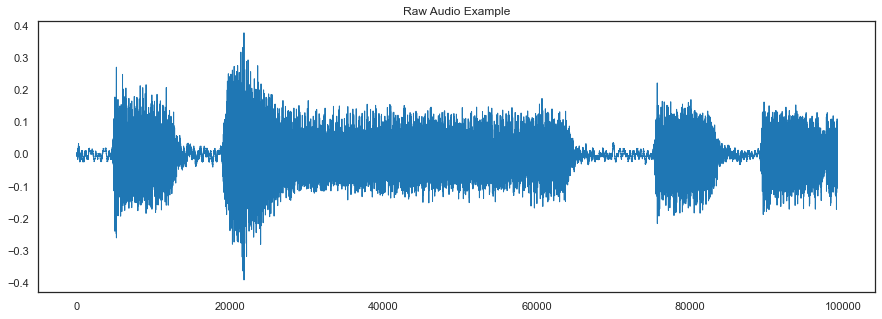

99225
Wall time: 528 ms


In [7]:
%%time
pd.Series(y).plot(figsize=(15, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()
print(len(y))

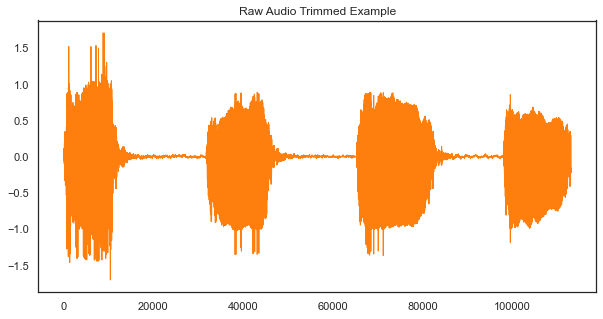

In [6]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=10)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

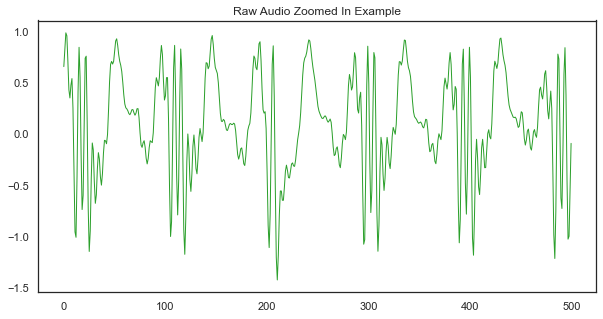

In [7]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

In [9]:
import matplotlib.pyplot as plt
import numpy as np


## 3. Creating a Spectogram

In [18]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 297)

C:\Users\31653\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\31653\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\31653\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


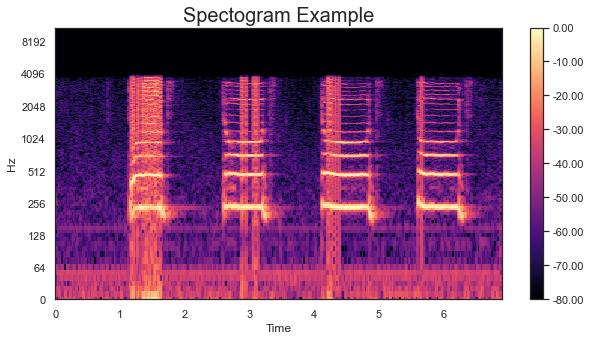

In [19]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## 4. Creating a Mel Spectogram

In [20]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

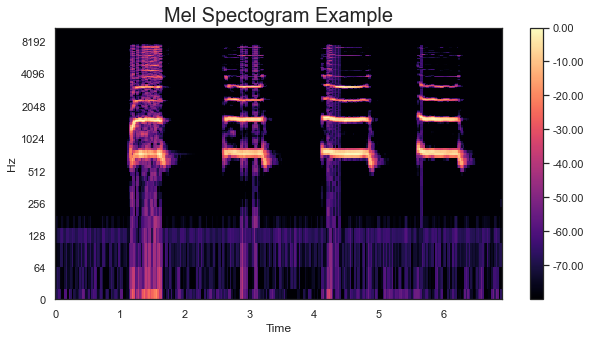

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()